Pre-Tokenized datasets & Subwords text encoder
--------------
- 이번 Lab에서는 사전 토큰화된 데이터셋으로 훈련시키는 방법에 대해서 배움
- 또한, Subwords에 대한 text encoder에 대해서 살펴보면서 여기서 생기는 문제점과 이를 해결하기 위한 방안에 대해서 생각해볼 예정(Week3)

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

Lab3 실행을 위한 tensorflow 설치 (2.5.0 이상의 버전이 필요)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


- 설치된 TF의 버전 확인
- 더불어, python3 환경인지도 확인 필요

In [ ]:
# If the import fails, run this
# !pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)


- TensorFlow에서 제공되는 dataset, TFDS(TensorFlow Data Services)를 사용하기 위해서 import
- 본 예제에서는 그 중 영화 리뷰와 관련된 자료인 imdb 자료를 load
- imdb: 많은 양의 데이터와 50,000개의 영화 리뷰를 포함하고 있으며, 이는 긍정적인 리뷰 또는 부정적인 리뷰로 분류되어 있음
- TFDS를 사용하면 train data와 test data를 분류가 이미 되어있으므로 ML과 DL에 사용하기 편리함
- 특히 이번에는 그 하위폴더인 subwords8k를 사용함으로써 미리 토큰화한 데이터를 가지고 학습에 사용함

In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
tokenizer = info.features['text'].encoder

- Access the subword text encoder

In [ ]:
print(tokenizer.subwords)

- 사전훈련된 subwords tokenizer 
- subwords의 property를 살펴보면 단어의 특성 파악 가능

In [ ]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


- encoding & decoding 하는 방법
- 결과로부터 encoding을 하면 토큰으로 시퀀싱한 결과를 볼 수 있고, decoding을 하면 원래의 문장으로 해석한 결과를 확인 가능

In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


- 토큰 자체를 확인하기 위한 방법
- 대소문자를 구분하고 문장 부호를 표시

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [ ]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


- tf.keras.layers.Embedding: 각 단어마다 16차원의 배열을 할당함으로써 단어가 가지는 특성을 64차원의 값을 통해서 표현
- tf.keras.layers.GlobalAveragePooling1D: 전례와 달리 쉽게 flatten되지 않으므로 GlobalAveragePooling1D를 사용함.
- tf.keras.layers.Dense: classification을 위해서 각 relu, sigmoid를 activation fn으로 가지는 layer에 assign



In [ ]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 23s 56ms/step - loss: 0.6747 - accuracy: 0.6184 - val_loss: 0.6237 - val_accuracy: 0.7675
Epoch 2/10
391/391 [==============================] - 22s 56ms/step - loss: 0.5160 - accuracy: 0.8051 - val_loss: 0.4526 - val_accuracy: 0.8061
Epoch 3/10
391/391 [==============================] - 23s 57ms/step - loss: 0.3667 - accuracy: 0.8716 - val_loss: 0.3604 - val_accuracy: 0.8659
Epoch 4/10
391/391 [==============================] - 23s 57ms/step - loss: 0.2982 - accuracy: 0.8937 - val_loss: 0.3269 - val_accuracy: 0.8746
Epoch 5/10
391/391 [==============================] - 23s 56ms/step - loss: 0.2609 - accuracy: 0.9064 - val_loss: 0.3162 - val_accuracy: 0.8734
Epoch 6/10
391/391 [==============================] - 22s 55ms/step - loss: 0.2345 - accuracy: 0.9168 - val_loss: 0.3083 - val_accuracy: 0.8795
Epoch 7/10
391/391 [==============================] - 23s 56ms/step - loss: 0.2137 - accuracy: 0.9238 - val_loss: 0.3050 - val_accuracy:

- epoch을 10번으로 설정하고 학습 진행
- label 값이 이원화 되어있기 때문에 binary_crossentropy를 사용
- 추가로 optimizer로 Adam을 사용한 모습을 확인 가능

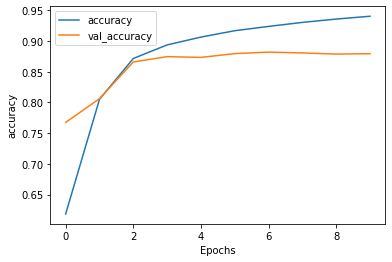

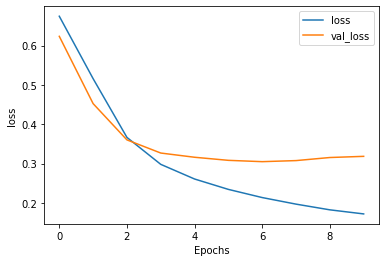

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

- Epoch당 Accuracy와 validation의 accuracy와 loss를 나타낸 그래프
- 강의 비디오에서는 낮은 accuracy와 val_accuracy를 확인할 수 있었음
- 이는 subword가 조합 순서에 따라서 의미를 가지 때문임
- 이러한 문제는 RNN으로 해결할 예정




### ※ 실제로는 높은 accuracy를 도출해냈는데, 타 NLP 강좌에 의하면 사실 GlobalAveragePooling을 사용한 Deep한 1D Convolution이 대부분의 LSTM을 이용한 방법보다 나은 performance를 보인다고 함
[출처] [관련 Coursera 토론 포럼](https://www.coursera.org/learn/natural-language-processing-tensorflow/discussions/weeks/2/threads/zH5fRxBkEeuoKgpcLmLqdw)


In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

(8185, 64)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Visualization을 위해서 vector data와 meta data를 추출하는 모습
- vecs.tsv: 각 단어에 할당된 64차원 벡터 데이터
- meta.tsv: 각 단어의 토큰화된 모습이 아닌 진짜 모습
- vecs.tsv 파일과 meta.tsv 파일을 직접 다운로드하는 모습
- [projector.tensorflow.org](https://projector.tensorflow.org)에서 데이터를 직접 넣어서 클러스터링 visualization 확인 가능